In [1]:
from pylab import rcParams
import numpy as np
import math

In [2]:
import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree

In [4]:
file = open("predicate-matrix-continuous.txt", "r")
attr = []
for line in file:
    p = line.strip().split()
    p = [float(i) for i in p]
    attr.append(p)

In [5]:
file = open('classes.txt', "r")
animals = []
for line in file:
    p = line.strip().split()
#     animals[int(p[0])] = p[1]
    animals.append(p[1])

In [6]:
pca = PCA(n_components=2)
components = pca.fit_transform(attr)

finalDf = pd.concat([pd.DataFrame(components), pd.DataFrame(animals)], axis = 1)

In [7]:
finalDf.columns = ["0","1","2"]

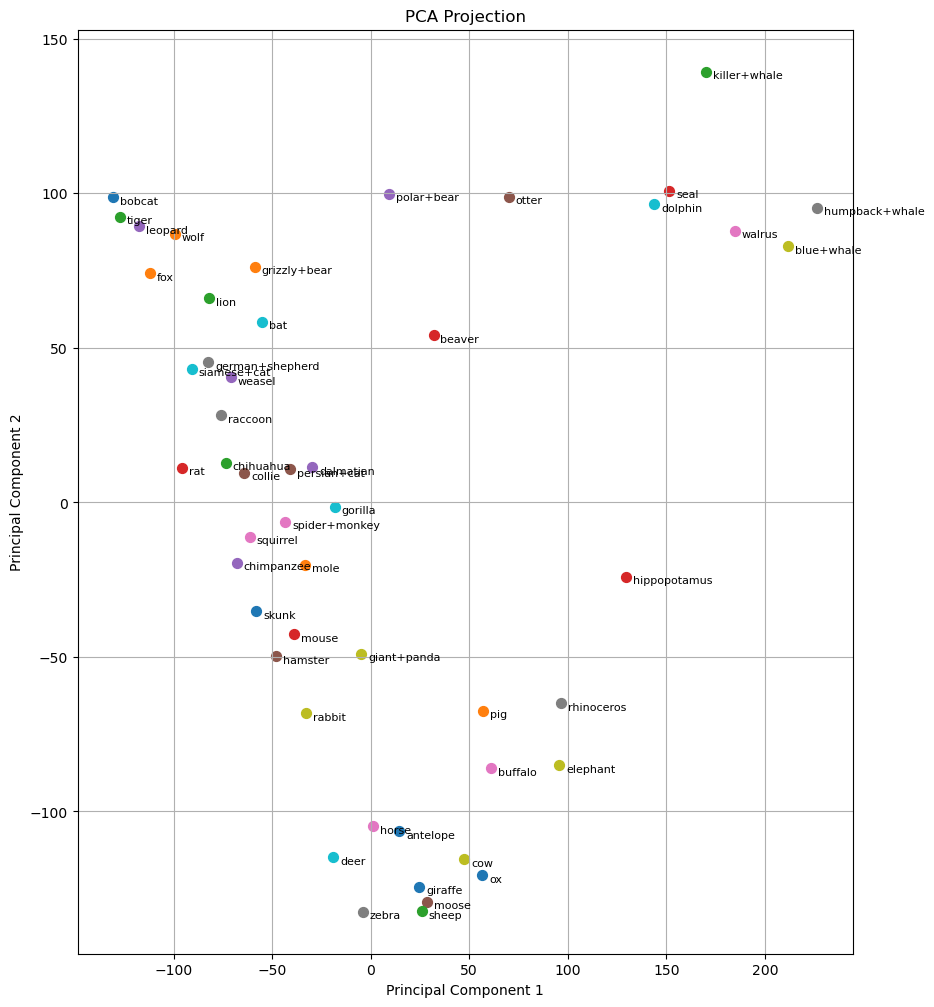

In [8]:
rcParams['figure.figsize'] = 10, 12
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('PCA Projection', fontsize = 12)

targets = animals
for target in targets:
    indicesToKeep = finalDf['2'] == target
    ax.scatter(finalDf.loc[indicesToKeep, '0']
               , finalDf.loc[indicesToKeep, '1']
               , s = 50)
for idx, row in finalDf.iterrows():
    ax.annotate(row['2'], (row['0'], row['1']),xytext=(5,-5),
                textcoords='offset points', family='sans-serif', fontsize=8)
ax.grid()

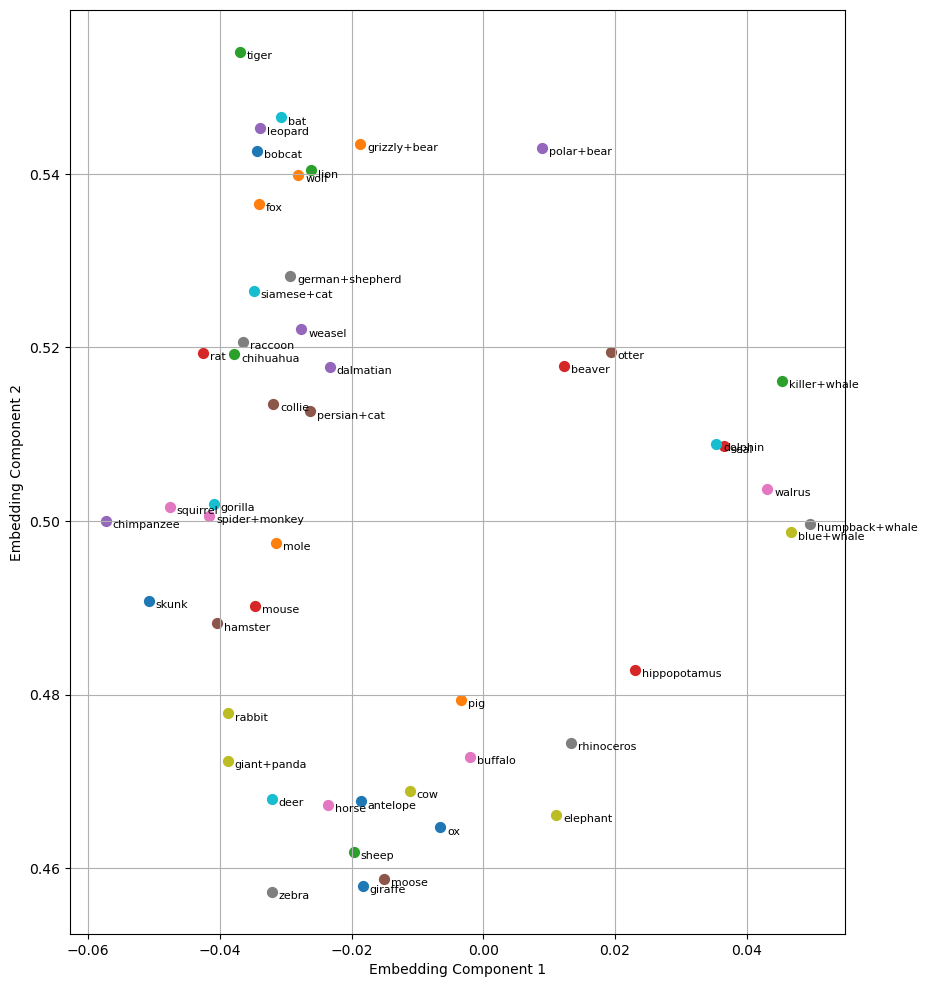

In [10]:
from sklearn.manifold import TSNE
Z = TSNE(n_components=2, perplexity=49.0).fit_transform(np.array(attr))
finalDf = pd.concat([pd.DataFrame(Z), pd.DataFrame(animals)], axis = 1)
finalDf.columns = ["0","1","2"]
rcParams['figure.figsize'] = 10, 12
fig = plt.figure()
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Embedding Component 1', fontsize = 10)
ax.set_ylabel('Embedding Component 2', fontsize = 10)
#ax.set_title('PCA Projection', fontsize = 12)

targets = animals
for target in targets:
    indicesToKeep = finalDf['2'] == target
    ax.scatter(finalDf.loc[indicesToKeep, '0']
               , finalDf.loc[indicesToKeep, '1']
               , s = 50)
for idx, row in finalDf.iterrows():
    ax.annotate(row['2'], (row['0'], row['1']),xytext=(5,-5),
                textcoords='offset points', family='sans-serif', fontsize=8)
ax.grid()

In [11]:
def dist(a,b):
    ans = 0
    for i in range(len(a)):
        ans += (a[i]-b[i])*(a[i]-b[i])
    return math.sqrt(ans)

In [12]:
Z_pca = PCA(n_components=2).fit_transform(attr)

Z_tnse_5 = TSNE(n_components=2, perplexity=5.0).fit_transform(np.array(attr))

Z_tnse_10 = TSNE(n_components=2, perplexity=10.0).fit_transform(np.array(attr))

Z_tnse_25 = TSNE(n_components=2, perplexity=25.0).fit_transform(np.array(attr))

Z_tnse_49 = TSNE(n_components=2, perplexity=49.0).fit_transform(np.array(attr))

In [13]:
D = []
for i in range(len(attr)):
    temp = []
    for j in range(len(attr)):
        temp.append(dist(attr[i],attr[j]))
    D.append(temp)
        

In [14]:
mean_D = 0
for i in range(len(attr)):
    for j in range(len(attr)):
        mean_D += D[i][j]
mean_D /= len(attr)*len(attr)   

In [15]:
Z = Z_tnse_49

In [16]:
D_hat = []
for i in range(len(attr)):
    temp = []
    for j in range(len(attr)):
        temp.append(dist(Z[i],Z[j]))
    D_hat.append(temp)

In [17]:
mean_D_hat = 0
for i in range(len(attr)):
    for j in range(len(attr)):
        mean_D_hat += D_hat[i][j]
mean_D_hat /= len(attr)*len(attr)   

In [18]:
c = mean_D/mean_D_hat

In [19]:
distort = []
for i in range(len(attr)):
    dis = []
    for j in range(len(attr)):
        if(i==j): dis.append(0)
        else:
            ratio = D[i][j]/(c*D_hat[i][j])
            if(ratio>=1): dis.append(ratio)
            else: dis.append(1/ratio)
    distort.append(dis)

In [20]:
max_distort = 0
for i in range(len(attr)):
    for j in range(len(attr)):
        max_distort = max(max_distort,distort[i][j])